# Loading required packages and data

In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(here))
library(parallel)
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)

library(Seurat)
library(SeuratDisk)
library(SeuratData)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘sp’


The following object is masked from ‘package:IRanges’:

    %over%



Attaching package: ‘SeuratObject’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays


The following object is masked from ‘package:GenomicRanges’:

    intersect


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following object is masked from ‘package:IRanges’:

    intersect


The following object is masked from ‘package:S4Vectors’:

    intersect


The following object is masked from ‘package:BiocGenerics’:

    intersect


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [2]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/rpodder/miniconda3/envs/SingleCell_Env/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] SeuratData_0.2.2.9001       SeuratDisk_0.0.0.9020      
 [3] Seurat_5.0.0                SeuratObject_5.0.0         
 [5] sp_2.1-1                    here_1.0.1                 
 [7] rhdf5_2.42.1                SummarizedExperiment_1.28.0
 [9] Biobase

In [3]:
#setting archr threads 
addArchRThreads(threads = 1)
#adding mouse archr genome
addArchRGenome('mm10')

Setting default number of Parallel threads to 1.

Setting default genome to Mm10.



In [4]:
PROJDIR=here('/projects/pfenninggroup/singleCell/macaque_ventralhorn_snRNA-seq/data/tidy_data/ArchRProjects')
main_dir = file.path(PROJDIR,'Mouse_VentralHorn_scATAC_Neurons')

# load subtype projects
proj = loadArchRProject(main_dir)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

# QC Analysis of atac-seq data using TSSEnrichment scores and log10(nFrags) values

If TSS Enrichment isn’t high enough, it can mean that transposition occurred genome wide as opposed to selectively at open chromatin regions. 4 is the ArchR default, but this will be dependent on the data, TSS regions, species, and many other factors. 

In [5]:
p1 <- plotGroups(
    ArchRProj = proj, 
    groupBy = "Sample", 
    colorBy = "cellColData", 
    name = "TSSEnrichment",
    plotAs = "ridges"
   )

1 




Picking joint bandwidth of 0.966



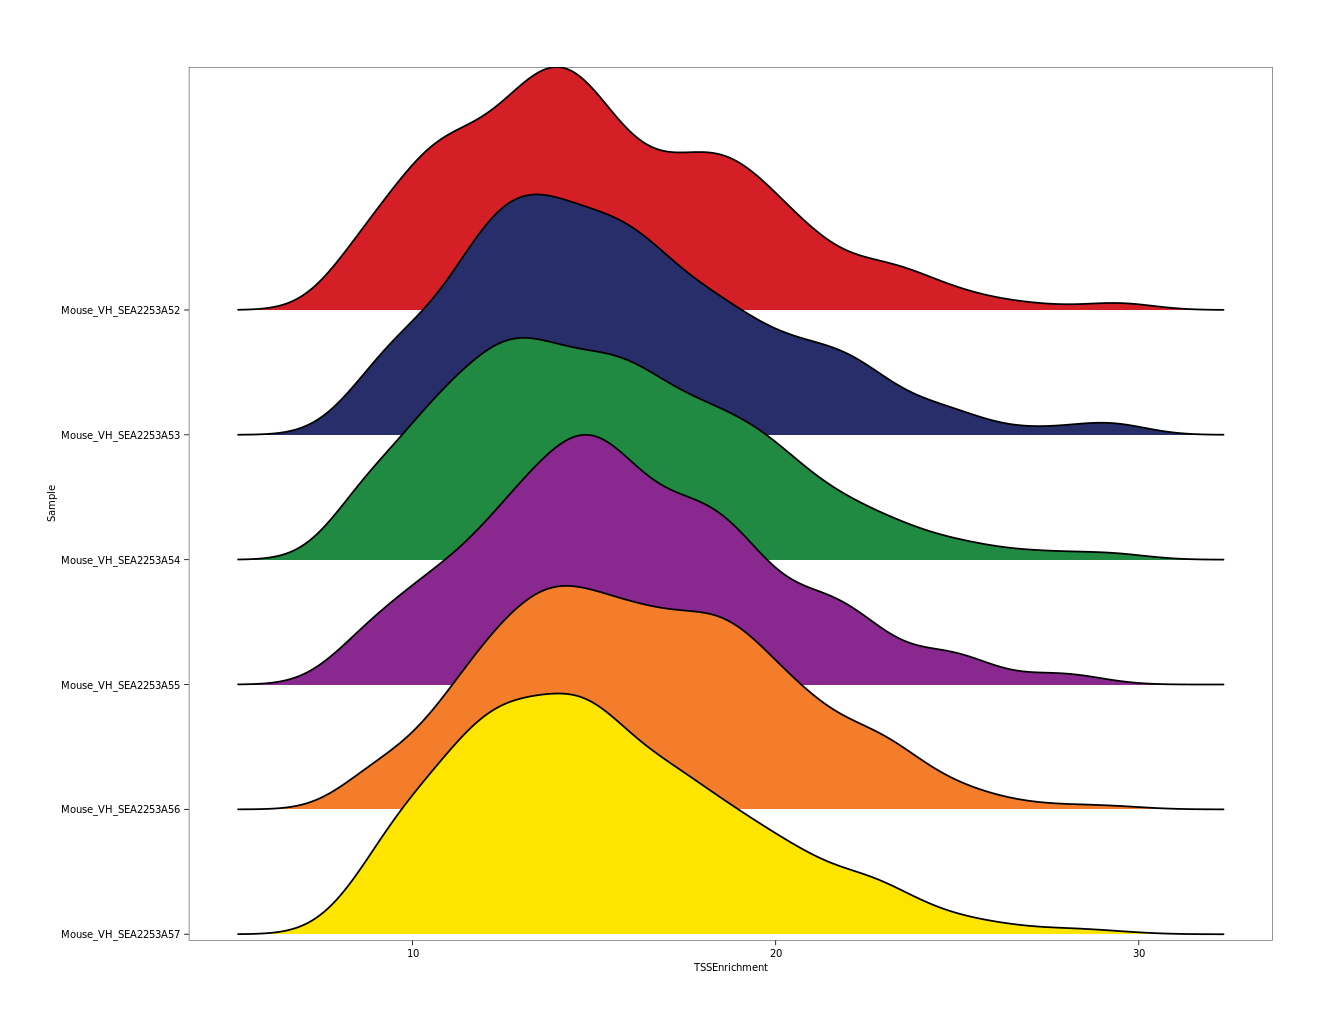

In [6]:
p1

In the above figure we observe that the TSSEnrichment scores across samples is in the range of 10-20 across the samples suggesting good data quality

When a cell has too many or too few fragments, it can be an indicator of low cell quality

In [7]:
p2 <- plotGroups(
    ArchRProj = proj, 
    groupBy = "Sample", 
    colorBy = "cellColData", 
    name = "log10(nFrags)",
    plotAs = "ridges"
   )

1 




Picking joint bandwidth of 0.0392



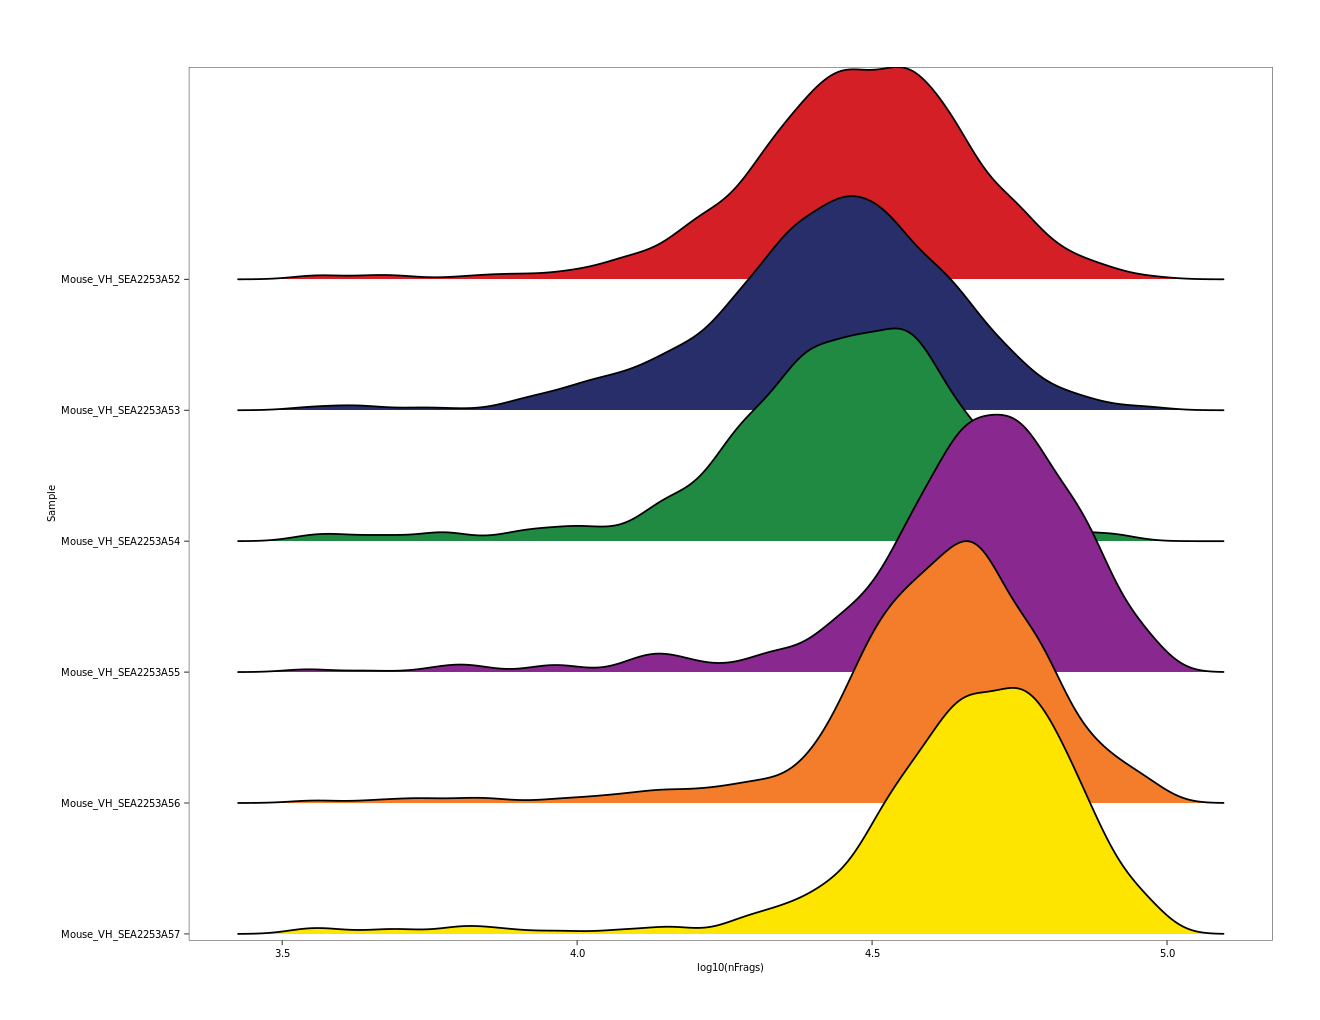

In [8]:
p2

In the above figure, we observe that the log10(nFrags) values across samples are in the range 4-5, indicating good quality data

# Motor Neuron Cluster Analysis

The goal is to see whether motor neurons are considerably different from other cell types in the mouse ventral horn of the spinal cord.

The atac-seq data provided already had cells clustered in different cell types after iterative LSI dimensionality reduction and clustering done in Seurat. 

In [5]:
getAvailableMatrices(proj)

[1] "GeneIntegrationMatrix" "GeneScoreMatrix"       "TileMatrix"

In [6]:
getCellColData(proj)

DataFrame with 5007 rows and 34 columns
                                                  Sample TSSEnrichment
                                             <character>     <numeric>
Mouse_VH_SEA2253A52#TACTGTTTGAAGCTAA Mouse_VH_SEA2253A52        11.858
Mouse_VH_SEA2253A52#AGCTTGCCTATTGCCA Mouse_VH_SEA2253A52        10.807
Mouse_VH_SEA2253A52#GCTTTGCACTTCGGGC Mouse_VH_SEA2253A52        10.430
Mouse_VH_SEA2253A52#TCAAGCAACACTCGAT Mouse_VH_SEA2253A52        11.924
Mouse_VH_SEA2253A52#CCTCCCTTGGAACCTT Mouse_VH_SEA2253A52        10.912
...                                                  ...           ...
Mouse_VH_SEA2253A57#CGCTTCCTCCTCAAAG Mouse_VH_SEA2253A57        25.672
Mouse_VH_SEA2253A57#CGCATCGGATTGGTTG Mouse_VH_SEA2253A57        23.836
Mouse_VH_SEA2253A57#GCCTCTTGAAGGTGCA Mouse_VH_SEA2253A57        12.767
Mouse_VH_SEA2253A57#CGCTTCCTATGTCCAG Mouse_VH_SEA2253A57        14.560
Mouse_VH_SEA2253A57#GCTTCTCGACAGCAAG Mouse_VH_SEA2253A57        19.095
                                     

I reran the iterative LSI and reclustered the data because the original clusters were generated a couple of years ago. To obtain updated clusters, I performed the analysis again.

In [11]:
#varFeats = c(10,60,100,200) #set the variable features we want to try, using several to find best one for this data
varFeats = c(200)

for(varFeat in varFeats){ 
    
    iterLSIName = paste0("IterativeLSIX",varFeat)
    proj <- addIterativeLSI( proj, useMatrix = "TileMatrix", 
                                 name = iterLSIName,
                                 LSIMethod = 2, 
                                 iterations = 4, # increase this if noticing subtle batch effects
                                 scaleTo = 15000, # median unique fragment per cell
                                 selectionMethod = 'var',
                                 clusterParams = list( # See Seurat::FindClusters
                                   resolution = .2, # lower this if noticing subtle batch effects
                                   sampleCells = 10000,  n.start = 10), 
                                 varFeatures = varFeat * 1000, # also can reduce this if noticing subtle batch effects
                                 dimsToUse = 1:30, force = TRUE)


    # add umap for iterative lsi
    UMAPName2 = paste0("UMAPX",varFeat)
    print(UMAPName2)
    proj <- addUMAP(proj, reducedDims = iterLSIName,  name = UMAPName2, 
                        nNeighbors = 30, minDist = 0.5, metric = "cosine", force = TRUE)


    # add clusters for iterative lsi
    ClustersName2 = paste0("ClustersX",varFeat)
    
    print(ClustersName2)
    proj <- addClusters( proj, reducedDims = iterLSIName, 
                             method = "Seurat", name = ClustersName2, 
                             filterBias = TRUE,resolution = 2, force = TRUE)
  

}

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-5816730dcfc51-Date-2024-04-28_Time-23-03-46.log
If there is an issue, please report to github with logFile!

2024-04-28 23:03:50 : Computing Total Across All Features, 0.022 mins elapsed.

2024-04-28 23:04:16 : Computing Top Features, 0.463 mins elapsed.

###########
2024-04-28 23:04:19 : Running LSI (1 of 4) on Top Features, 0.508 mins elapsed.
###########

2024-04-28 23:04:19 : Creating Partial Matrix, 0.51 mins elapsed.

2024-04-28 23:06:42 : Computing LSI, 2.896 mins elapsed.

2024-04-28 23:08:12 : Identifying Clusters, 4.395 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
2024-04-28 23:08:24 : Identified 15 Clusters, 4.591 mins elapsed.

2024-04-28 23:08:24 : Saving LSI Iteration, 4.591 mins elapsed.

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from

[1] "UMAPX200"


23:25:45 UMAP embedding parameters a = 0.583 b = 1.334

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

23:25:45 Read 5007 rows and found 30 numeric columns

23:25:45 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

23:25:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:25:47 Writing NN index file to temp file /tmp/Rtmpb48AQL/file5816773381bd6

23:25:47 Searching Annoy index using 32 threads, search_k = 3000

23:25:49 Annoy recall = 100%

23:25:50 Commencing smooth kNN distance calibration using 32 threads
 with target n_neighbors = 30

23:25:52 Initializing from normalized Laplacian

[1] "ClustersX200"


ArchR logging to : ArchRLogs/ArchR-addClusters-5816738f12dab-Date-2024-04-28_Time-23-26-18.log
If there is an issue, please report to github with logFile!

Overriding previous entry for ClustersX200

2024-04-28 23:26:18 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.004 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5007
Number of edges: 141950

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8246
Number of communities: 40
Elapsed time: 1 seconds


2024-04-28 23:26:29 : Testing Biased Clusters, 0.186 mins elapsed.

2024-04-28 23:26:31 : Testing Outlier Clusters, 0.208 mins elapsed.

2024-04-28 23:26:31 : Identified more clusters than maxClusters allowed (n = 0). Merging clusters to maxClusters (n = 25).
If this is not desired set maxClusters = NULL!, 0.208 mins elapsed.

2024-04-28 23:26:31 : Assigning Cluster Names to 25 Clusters, 0.208 mins elapsed.

2024-04-28 23:26:31 : Finished addClusters, 0.213 mins elapsed.



I examined the UMAPs of gene expression for four specific genes. The primary goal was to determine whether motor neurons are significantly distinct from other cell types in the ventral horn and if they can be easily clustered. Additionally, I wanted to assess their distinction from cholinergic interneurons. Although both motor neurons and cholinergic interneurons express CHAT, I needed to identify other marker genes specific to motor neurons. Therefore, I visualized the UMAPs for the following four putative marker genes:

- **CHAT**: Marker gene for motor neurons
- **PRPH**: Marker gene for motor neurons
- **PAX2**: Marker gene for cholinergic interneurons
- **POU6F2**: Marker gene for cholinergic interneurons

This allowed me to observe their distribution and differentiation.

Using gene score matrix:
A gene score is essentially a prediction of how highly expressed a gene will be based on the accessibility of regulatory elements in the vicinity of the gene.


[1] "UMAPX200"


Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-5816710374ff-Date-2024-04-28_Time-23-30-42.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2024-04-28 23:30:44 : 

1 
2 
3 
4 
5 
6 


Plotting Embedding

1 
2 
3 
4 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-5816710374ff-Date-2024-04-28_Time-23-30-42.log



$CHAT

$PRPH


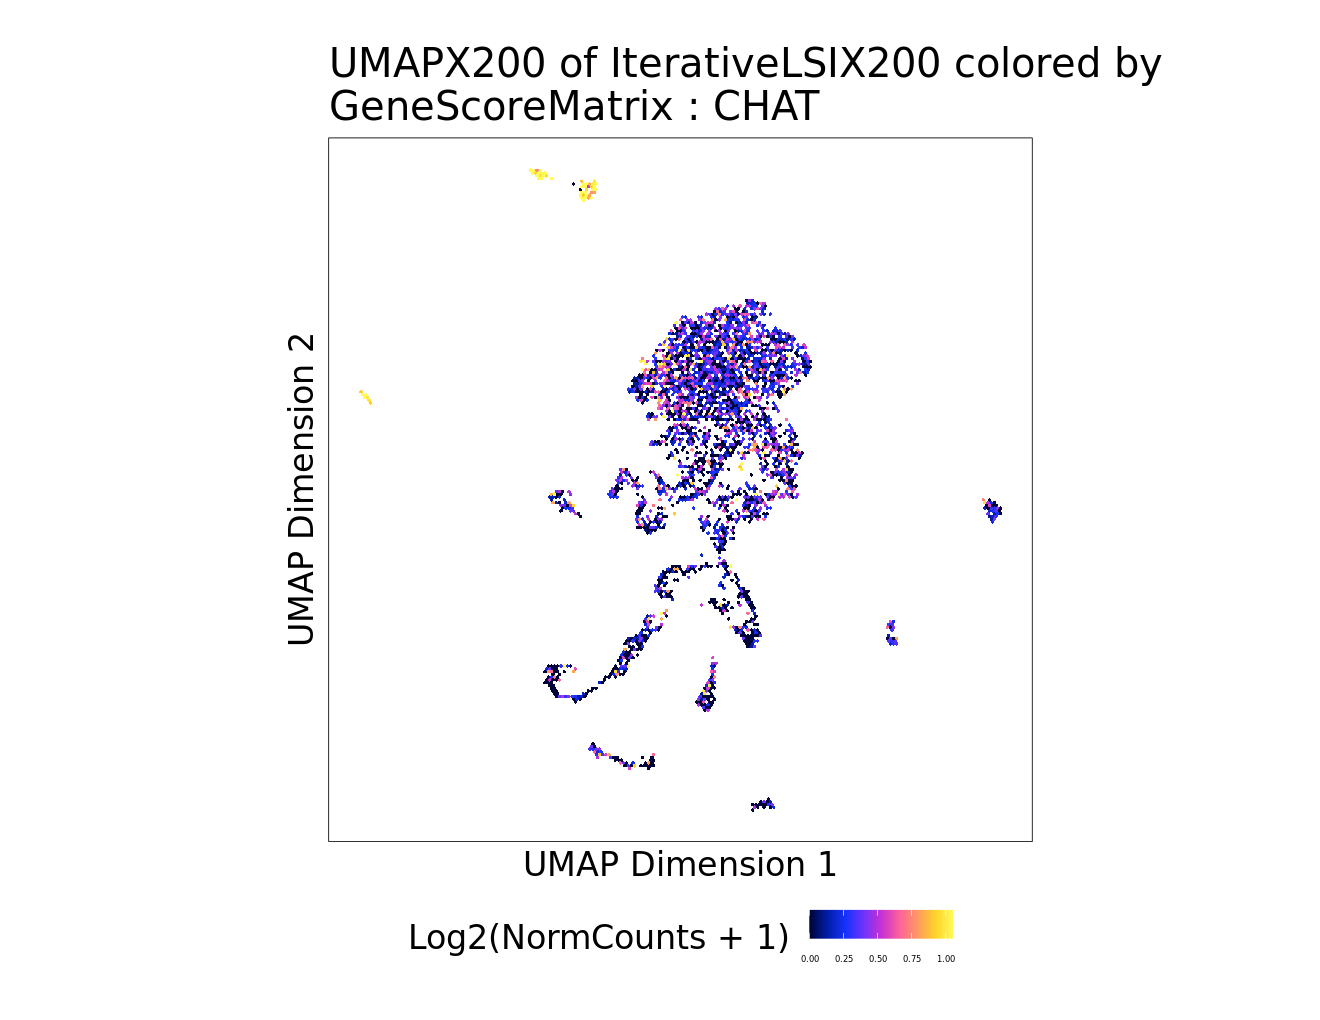


$PAX2


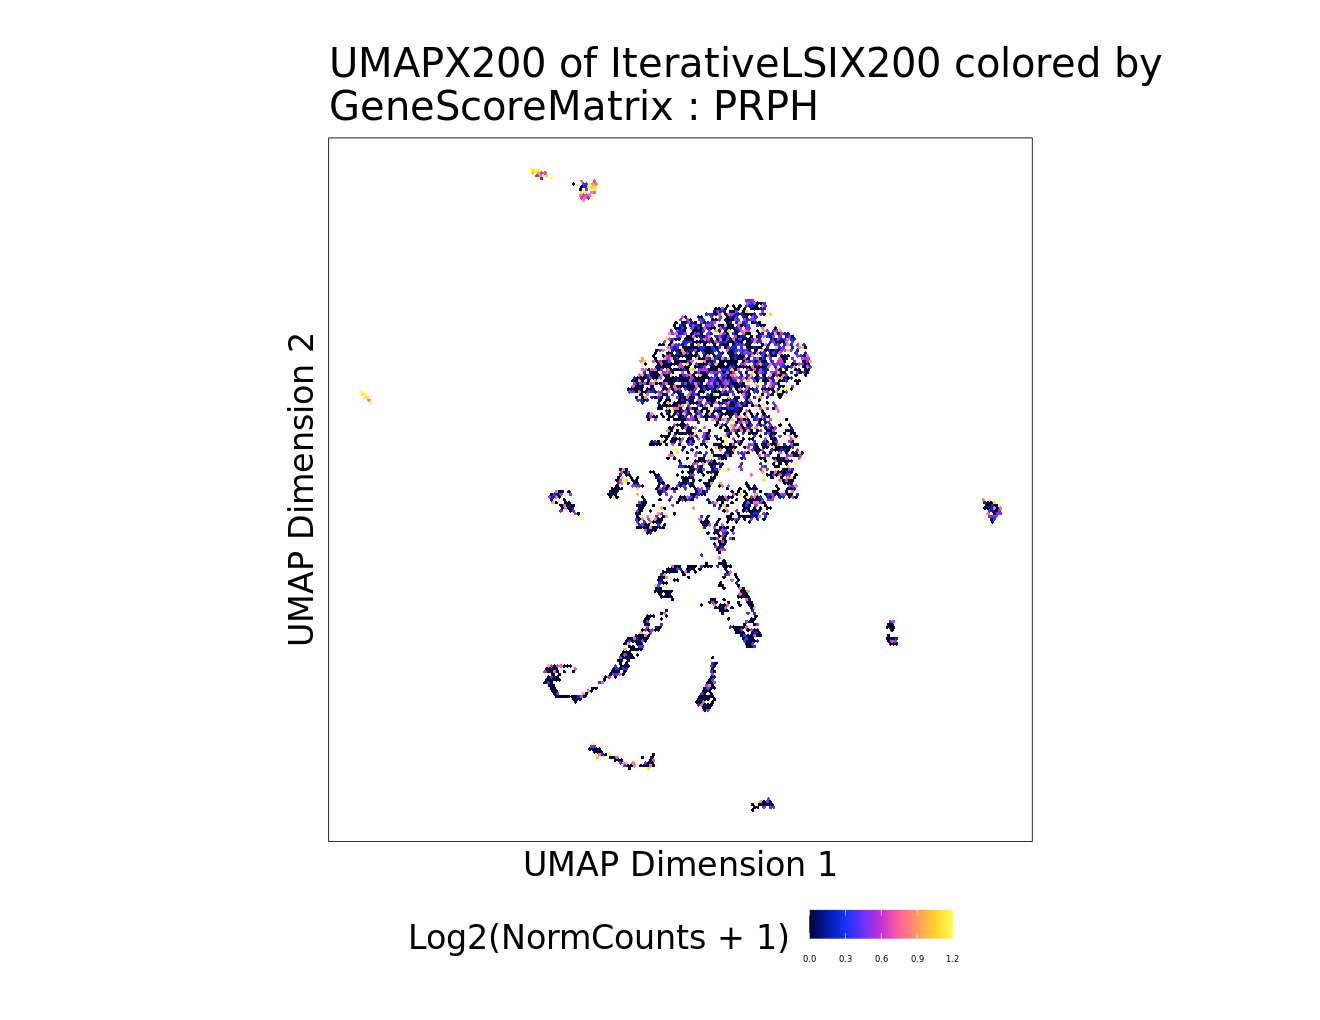


$POU6F2


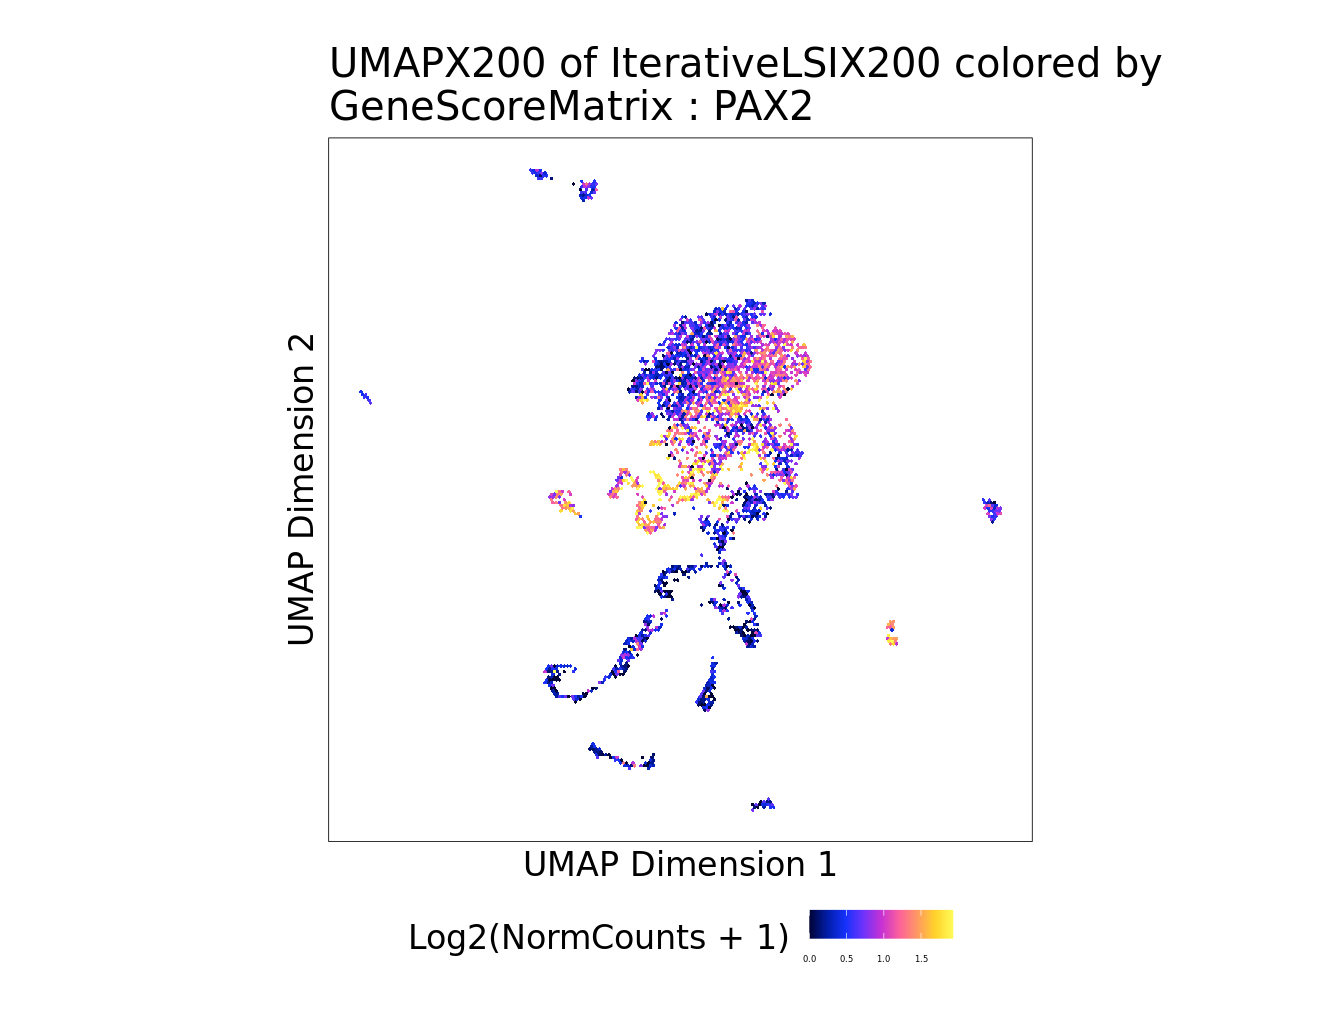

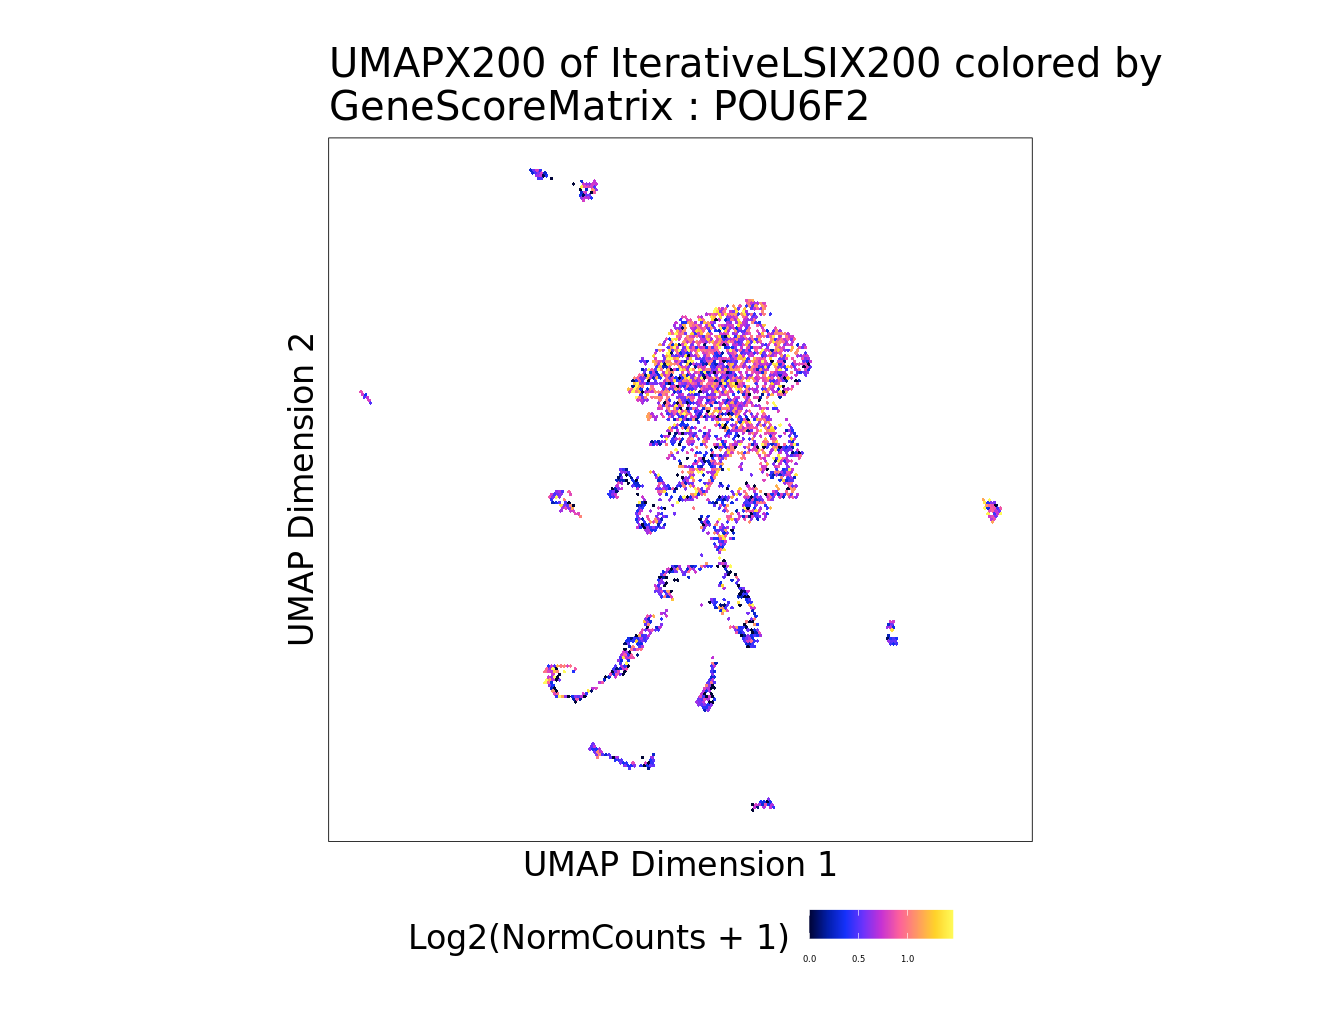

In [19]:
#varFeats = c(200)
markerGenes  <- c("CHAT","PRPH","PAX2","POU6F2")
for(varFeat in varFeats){
    
    ClustersName2 = paste0("ClustersX",varFeat)
    UMAPName2 = paste0("UMAPX",varFeat)
    print(UMAPName2)
    p3 <- plotEmbedding(ArchRProj = proj, colorBy = "GeneScoreMatrix", 
    name = markerGenes, 
    embedding = UMAPName2,
    baseSize = 20,
    size = 4)
    print(p3)
    }

Based on the UMAPs derived from the GeneScoreMatrix, we observe three distinct yellow clusters in the top left of the CHAT UMAP. These clusters exhibit high expression of PRPH but low expression of PAX2 and POU6F2. Consequently, we can conclude that motor neurons possess unique characteristics, distinguishing them from other cell types, and are not intermingled with cholinergic interneurons.

To further confirm the hypothesis, I visualized the UMAPs using the GeneIntegrationMatrix. ArchR not only allows for cluster identity assignment with gene scores but also facilitates integration with scRNA-seq data. This integration enhances cluster identity assignment by either directly using clusters identified in scRNA-seq or leveraging gene expression measurements post-integration. The integration works by aligning cells from scATAC-seq with those from scRNA-seq, comparing the scATAC-seq gene score matrix with the scRNA-seq gene expression matrix. The gene integration matrix was already present in the data, as a lab member had previously performed the ATAC-seq and RNA-seq integration.

[1] "UMAPX200"


Getting ImputeWeights

No imputeWeights found, returning NULL

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-581677ec209a5-Date-2024-04-28_Time-23-31-35.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneIntegrationMatrix

Getting Matrix Values...

2024-04-28 23:31:35 : 

1 
2 
3 
4 
5 
6 


Plotting Embedding

1 
2 
3 
4 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-581677ec209a5-Date-2024-04-28_Time-23-31-35.log



$CHAT

$PRPH


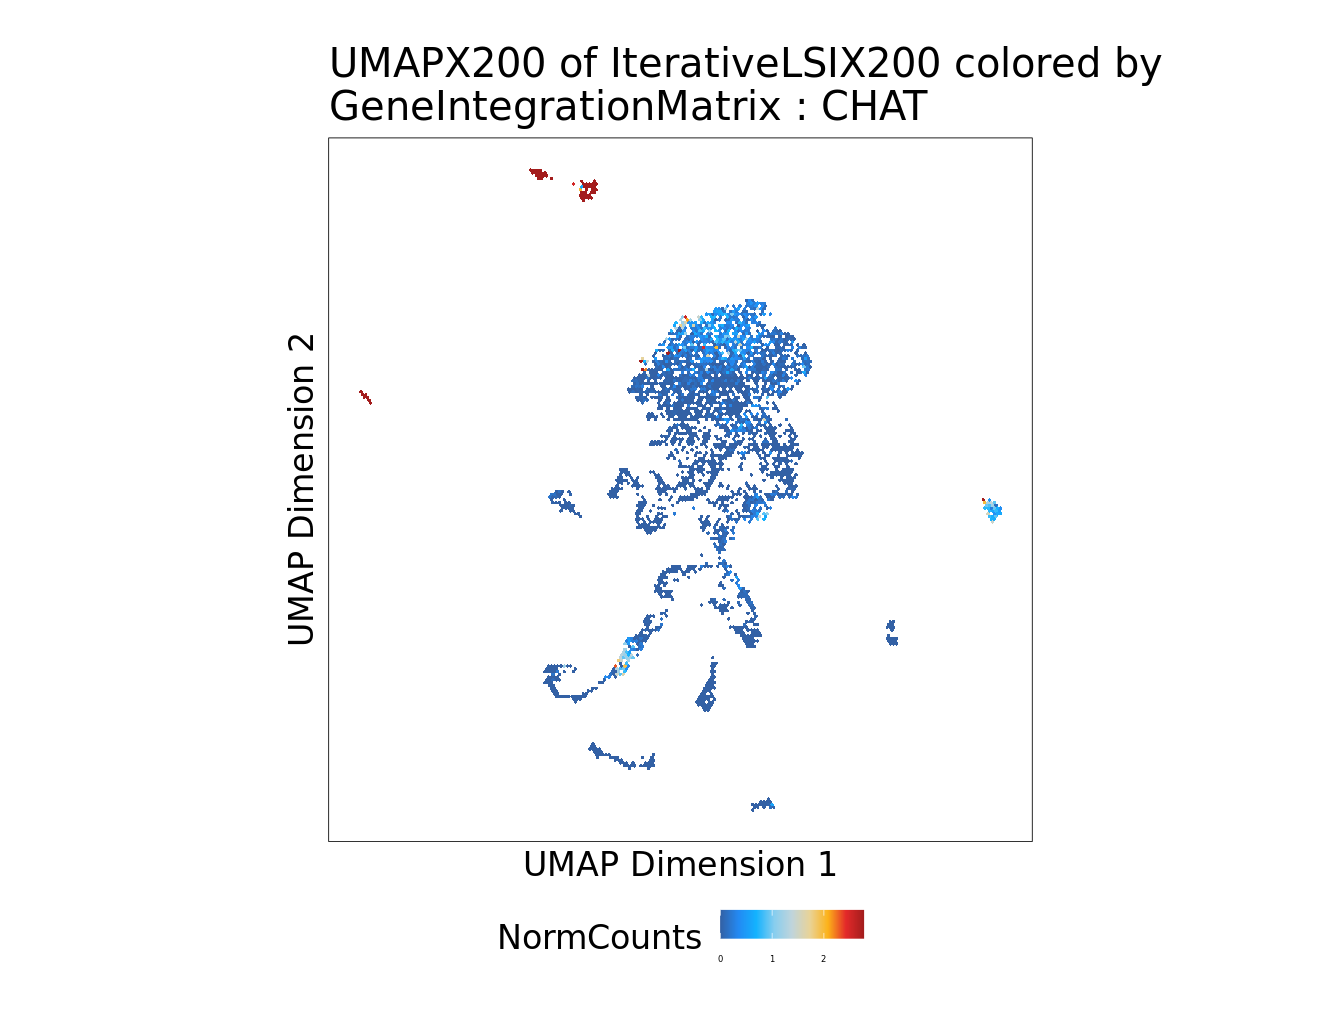


$PAX2


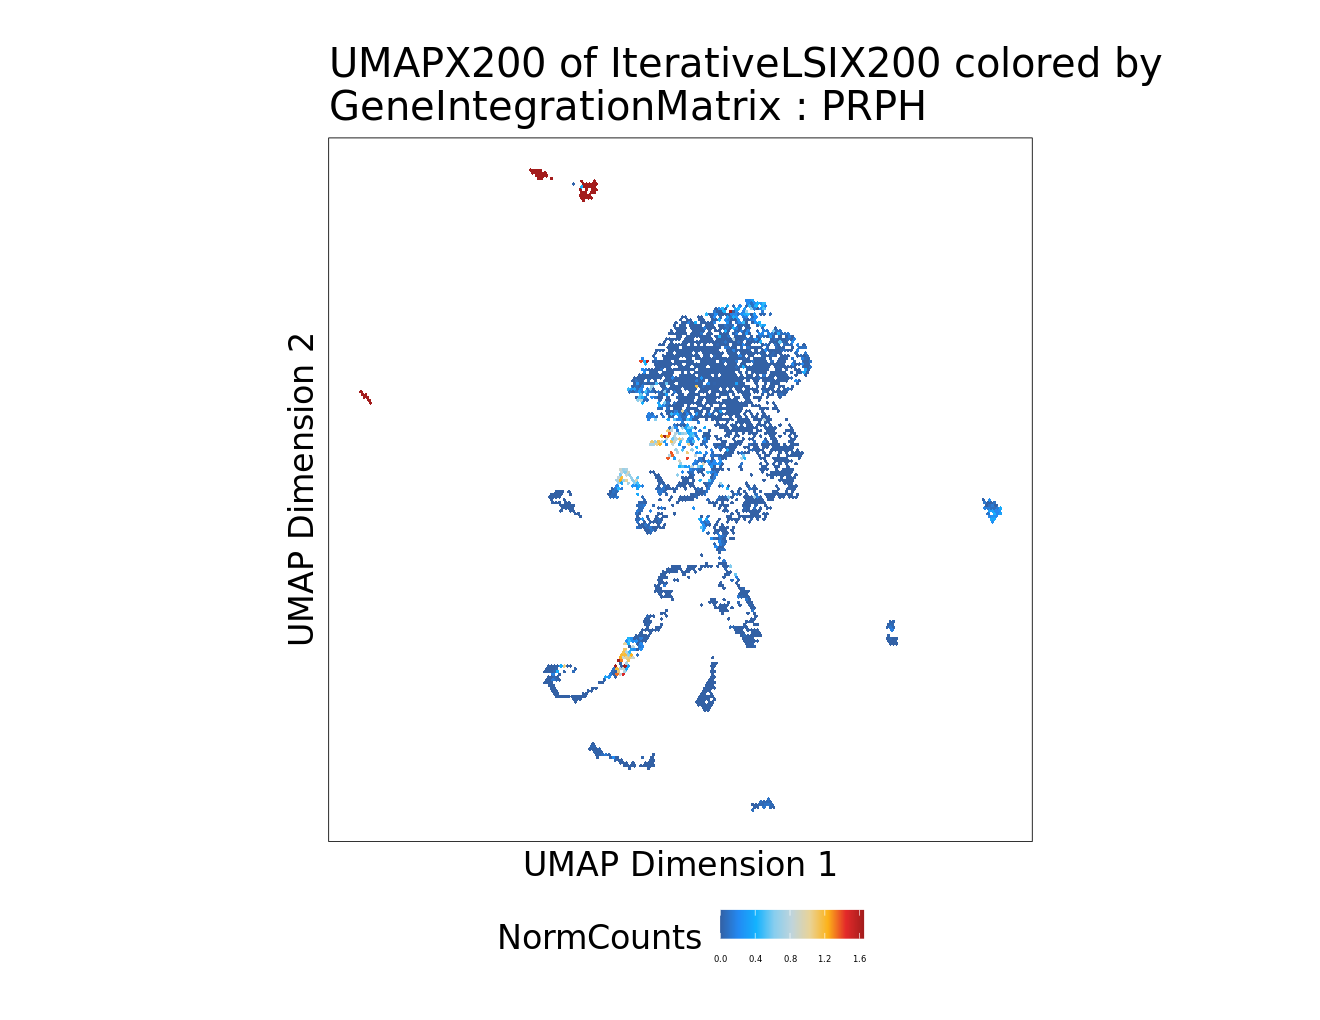


$POU6F2


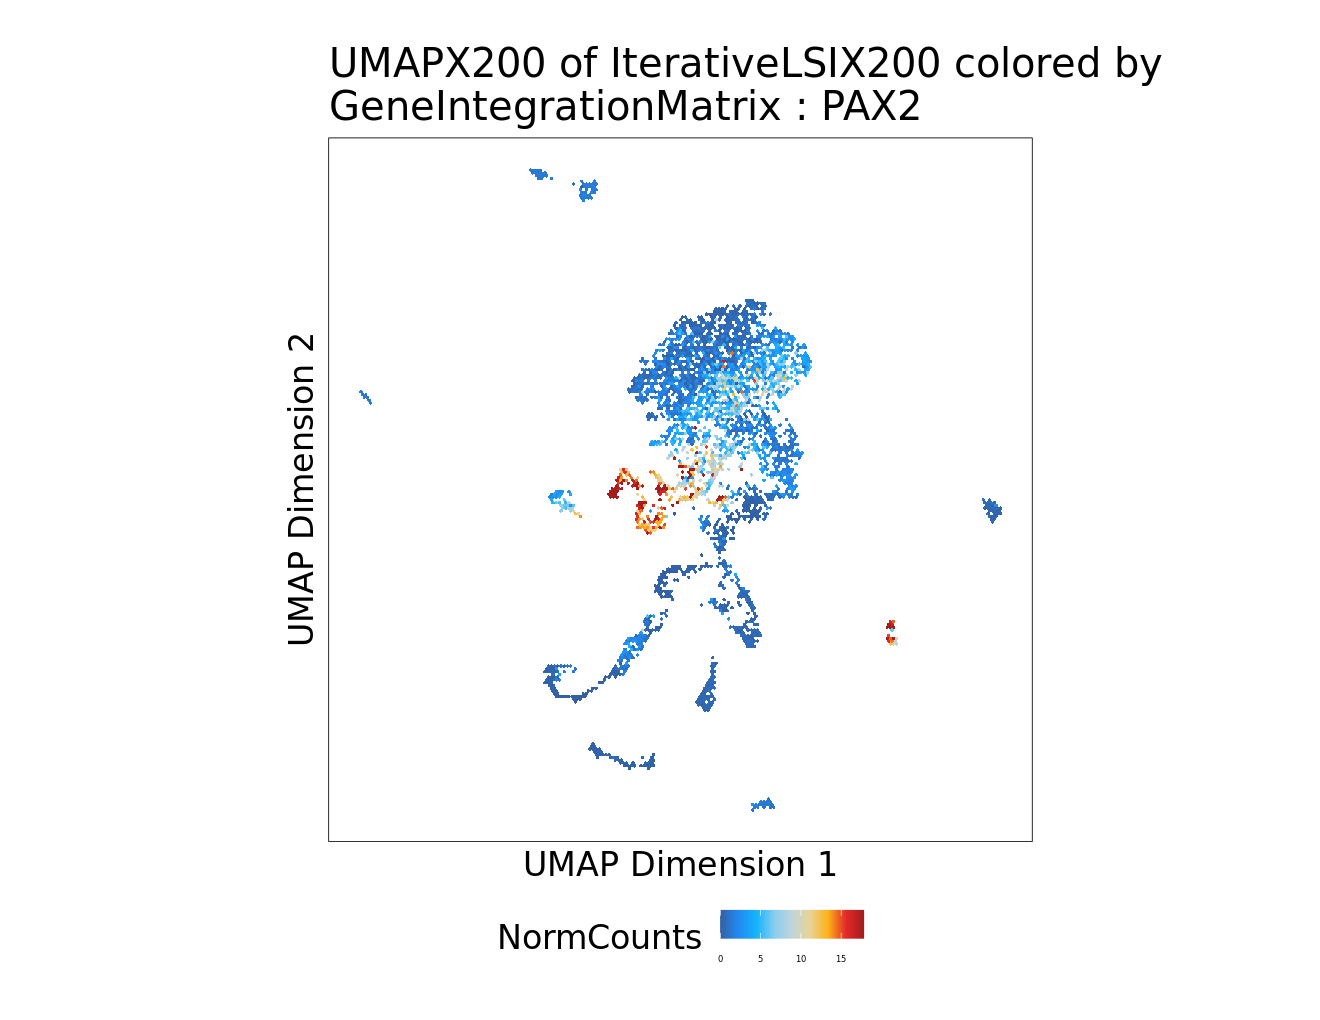

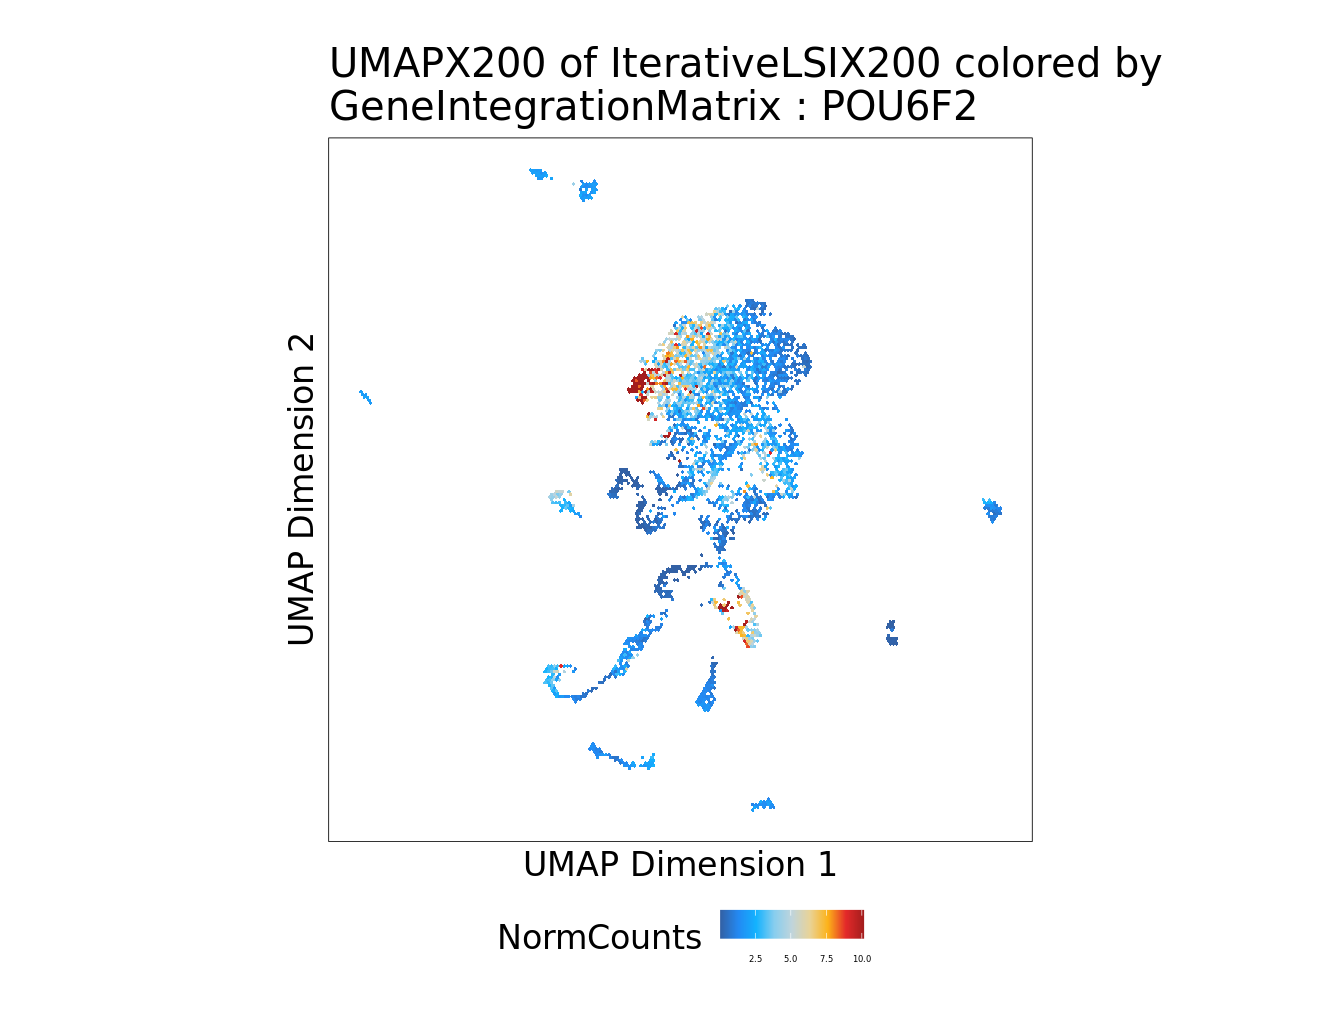

In [20]:
markerGenes  <- c("CHAT","PRPH","PAX2","POU6F2")
for(varFeat in varFeats){
    
    ClustersName2 = paste0("ClustersX",varFeat)
    UMAPName2 = paste0("UMAPX",varFeat)
    print(UMAPName2)
    p3 <- plotEmbedding(ArchRProj = proj, colorBy = "GeneIntegrationMatrix", 
    name = markerGenes, 
    embedding = UMAPName2,
    baseSize = 20,
    size = 4)
    print(p3)
    }

Once again, we observe a similar trend as seen with the GeneScoreMatrix: three clusters in the top left exhibit high expression of CHAT and PRPH, while showing low expression of PAX2 and POU6F2.

To identify the three clusters, I plotted the UMAPs based on the predicted cell types, that utilizes both scRNA-seq and ATAC-seq data to find the predicted cell types using Seurat. This information was already present in the data provided.

[1] "UMAPX200"


ArchR logging to : ArchRLogs/ArchR-plotEmbedding-581672c81a864-Date-2024-04-28_Time-23-32-40.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-581672c81a864-Date-2024-04-28_Time-23-32-40.log



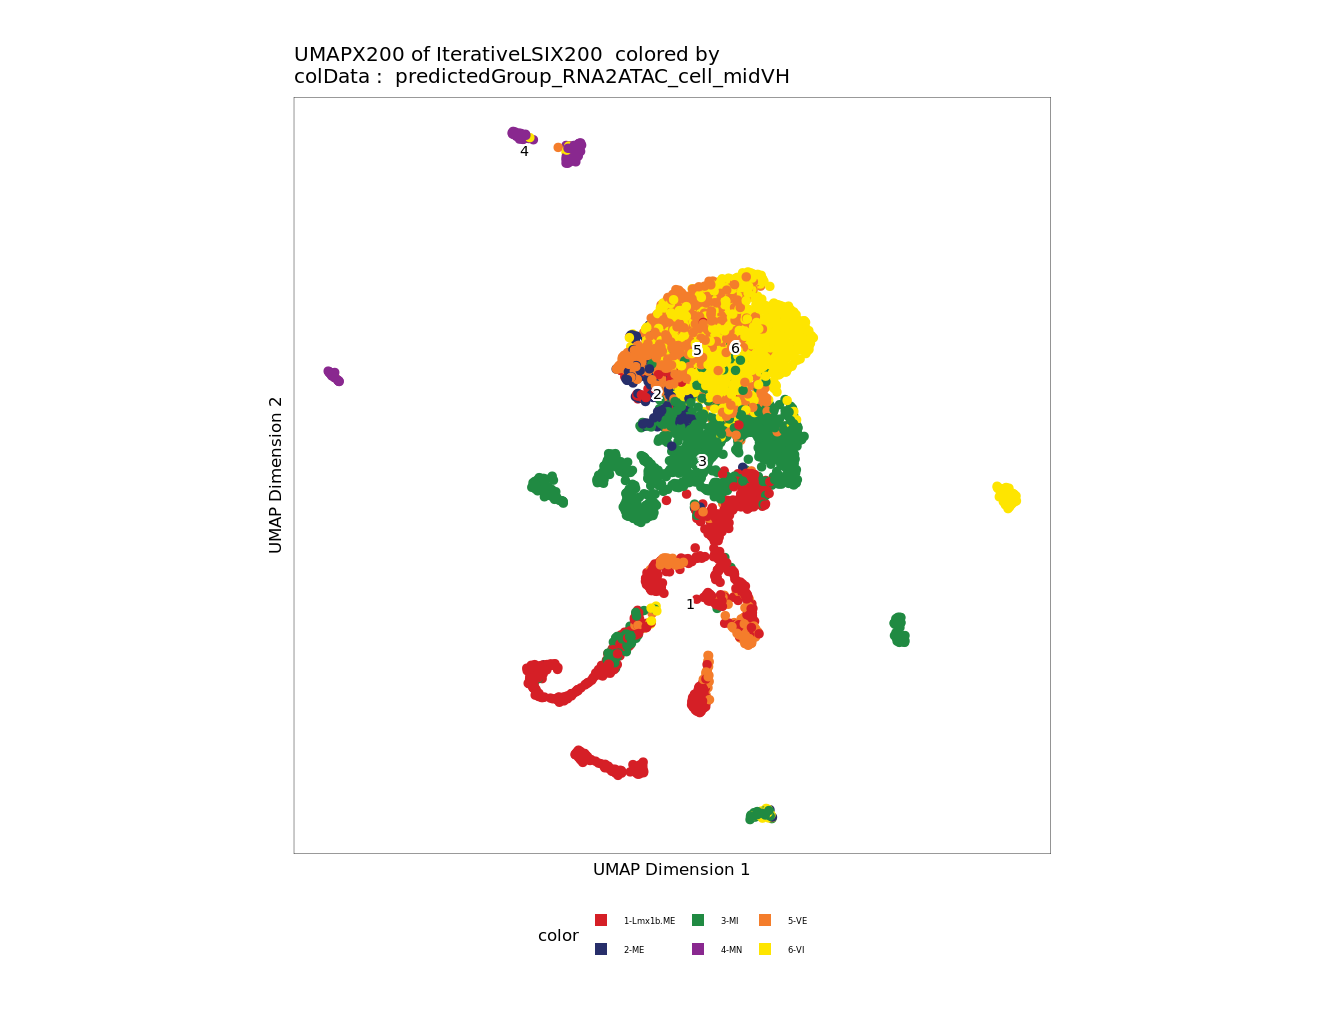

In [21]:
UMAPName2 = paste0("UMAPX200")
print(UMAPName2)
p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = "predictedGroup_RNA2ATAC_cell_midVH", embedding = UMAPName2, size=2)
print(p2)

As shown in the figure above, the motor neurons, highlighted in purple, form distinct clusters that are not found in other clusters. These clusters align with the UMAPs displaying high CHAT and PRPH expression and low PAX2 and POU6F2 expression from the previous UMAP results based on gene score and gene integration matrices. This confirms and validates the hypothesis that motor neurons can be distinctly clustered as a separate cell type. Consequently, this distinction allows for the development of targeted gene therapies to address motor function challenges, such as paralysis.